In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterGrid
from sklearn import metrics

stock_data = pd.read_csv(r'C:\Users\Zz\Desktop\aapl.csv', header = 0, index_col = 0)
dataset = stock_data.values
X = stock_data[['Close','Volume','Vol-5d', 'Return','MACD','RSI','EMA','MFI']]
Y = stock_data['signal']

X_train = X[:3000]
y_train = Y[:3000]
X_test = X[3000:]
y_test = Y[3000:]


In [ ]:
grid = {'n_estimators': [1000,1500,2000], 'max_features': [1,2,3,8]}
test_scores = []

rf_model = RandomForestClassifier()

for g in ParameterGrid(grid):
    rf_model.set_params(**g) 
    rf_model.fit(X_train, y_train)
    test_scores.append(rf_model.score(X_test, y_test))

best_index = np.argmax(test_scores)
print(test_scores[best_index], ParameterGrid(grid)[best_index])


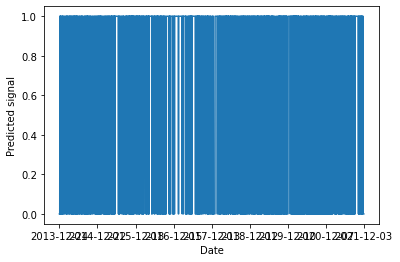

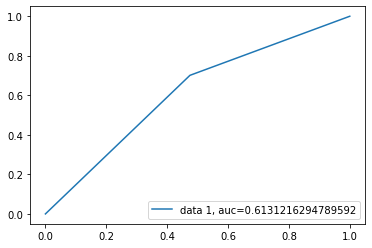

Mean Absolute Error: 0.38630684657671166
Mean Squared Error: 0.38630684657671166
Root Mean Squared Error: 0.6215358771436381


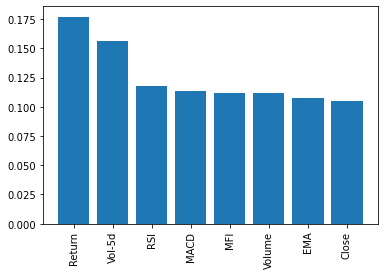

In [4]:
rf_model = RandomForestClassifier(n_estimators = 1000, max_features = 2)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

y_pred_series = pd.Series(y_pred, index=y_test.index)
y_pred_series.plot()
plt.ylabel("Predicted signal")
plt.show()

rf_model.score(X_test,y_test)

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

importances = rf_model.feature_importances_
sorted_index = np.argsort(importances)[::-1]
x_values = range(len(importances))
feature_names = ('Close','Volume','Vol-5d', 'Return','MACD','RSI','EMA','MFI')
labels = np.array(feature_names)[sorted_index]
plt.bar(x_values, importances[sorted_index], tick_label=labels)
plt.xticks(rotation=90)
plt.show()
